In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

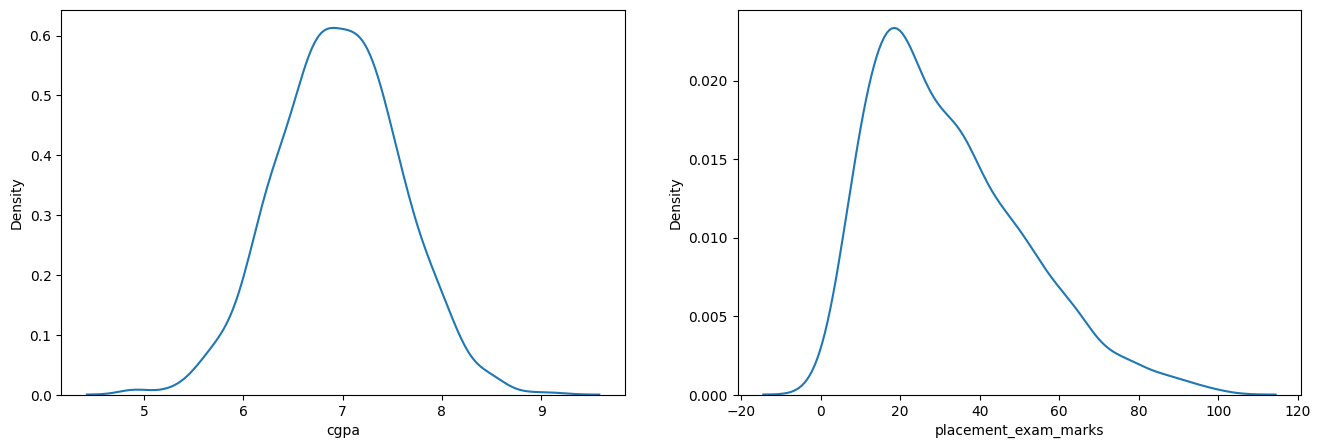

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(df['cgpa'])
plt.subplot(122)
sns.kdeplot(df['placement_exam_marks'])

In [13]:
print("Mean value of CGPA",df['cgpa'].mean())
print("std dev od CGPA",df['cgpa'].std())
print("min val CGPA",df['cgpa'].min())
print("max val CGPA",df['cgpa'].max())

Mean value of CGPA 6.96124
std dev od CGPA 0.6158978751323894
min val CGPA 4.89
max val CGPA 9.12


In [14]:
print("Highest allowed", df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed", df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [16]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


trimming

In [17]:
tdf = df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
tdf.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [18]:
tdf.shape

(995, 3)

# using z-sore

In [19]:
df['z-score'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [20]:
df.head()

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [28]:
df[(df['z-score']<-3) | (df['z-score']>3)]

,cgpa,placement_exam_marks,placed,z-score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [32]:
tz_df = df[ (df['z-score']<3) & (df['z-score']>-3)]
tz_df

,cgpa,placement_exam_marks,placed,z-score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


capping

In [33]:
upper_lim = df['cgpa'].mean()+3*df['cgpa'].std()
lower_lim = df['cgpa'].mean()-3*df['cgpa'].std()

In [34]:
df['cgpa'] = np.where(
    df['cgpa']>upper_lim,
    upper_lim,
    np.where(
        df['cgpa']<lower_lim,
        lower_lim,
        df['cgpa']
    )
)

In [36]:
df.shape

(1000, 4)

In [39]:
df['cgpa'].describe()

,cgpa
count,1000.000000
mean,6.961499
std,0.612688
min,5.113546
25%,6.550000
50%,6.960000
75%,7.370000
max,8.808934


# Using IQR : IQR proximity rule

In [40]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [42]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [43]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

<Axes: ylabel='placement_exam_marks'>

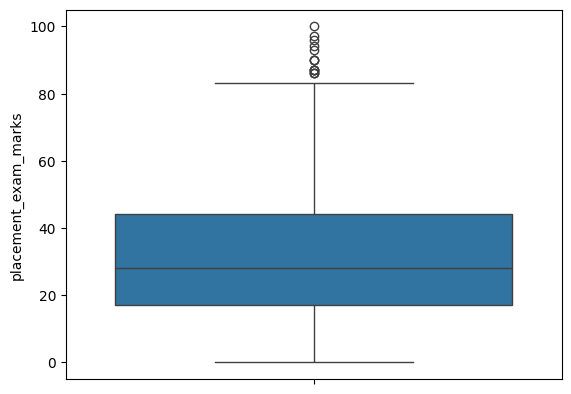

In [44]:
sns.boxplot(df['placement_exam_marks'])

In [45]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


In [46]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [47]:
percentile25, percentile75

(np.float64(17.0), np.float64(44.0))

In [48]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [49]:
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr

In [52]:
upperlimit, lowerlimit

(np.float64(84.5), np.float64(-23.5))

In [50]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upperlimit,upperlimit,np.where(
    df['placement_exam_marks']<lowerlimit,lowerlimit,df['placement_exam_marks'])
)

In [51]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.136500
std,18.865419
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,84.500000


<Axes: ylabel='placement_exam_marks'>

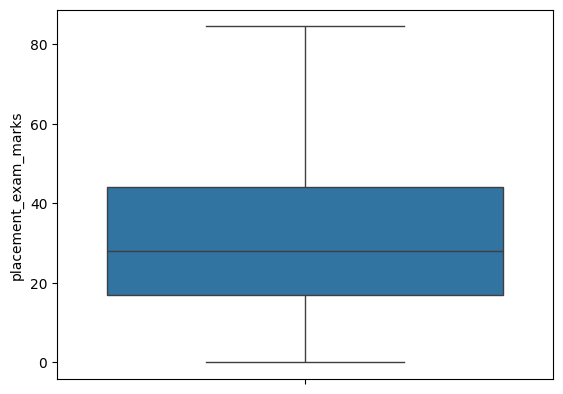

In [53]:
sns.boxplot(df['placement_exam_marks'])

# Winsorization

In [54]:
df = pd.read_csv('/content/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Weight', ylabel='Density'>

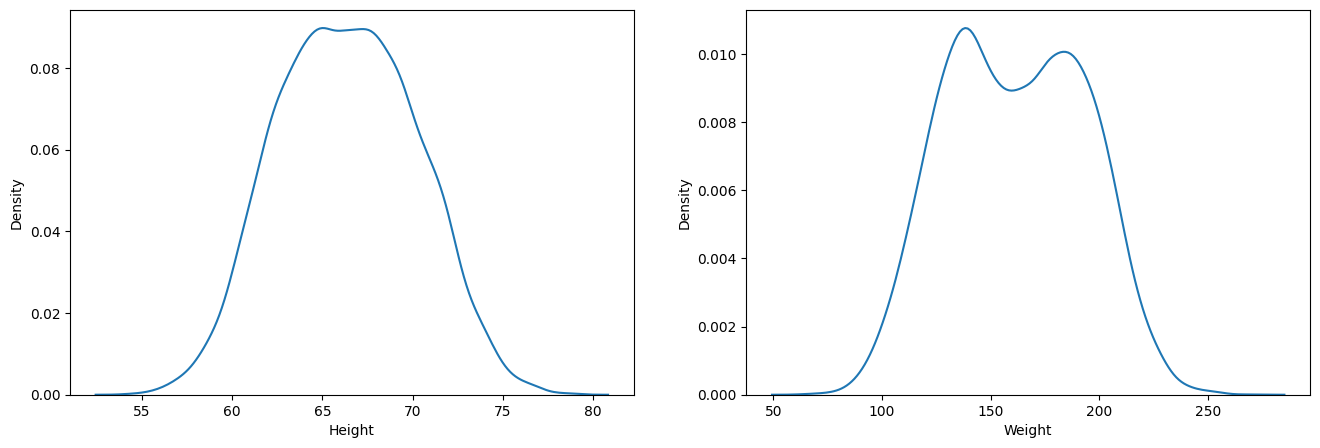

In [55]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.kdeplot(df['Height'])

plt.subplot(122)
sns.kdeplot(df['Weight'])

In [56]:
df['Height'].skew()

np.float64(0.04936908937689031)

In [57]:
df['Weight'].skew()

np.float64(0.03295450444592437)

<Axes: ylabel='Weight'>

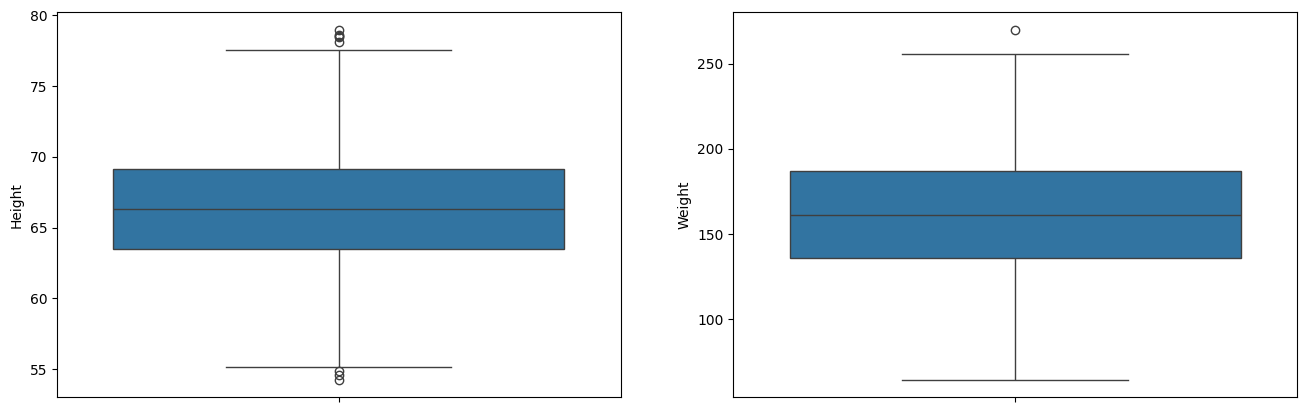

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.boxplot(df['Height'])

plt.subplot(122)
sns.boxplot(df['Weight'])

In [59]:
upperlim = df['Height'].quantile(0.99)
lowerlim = df['Height'].quantile(0.01)


In [60]:
#for capping

df['Height'] = np.where(
    df['Height']>upperlim,
    upperlim,
    np.where(
        df['Height']<lowerlim,
        lowerlim,
        df['Height']
    )
)

<Axes: ylabel='Height'>

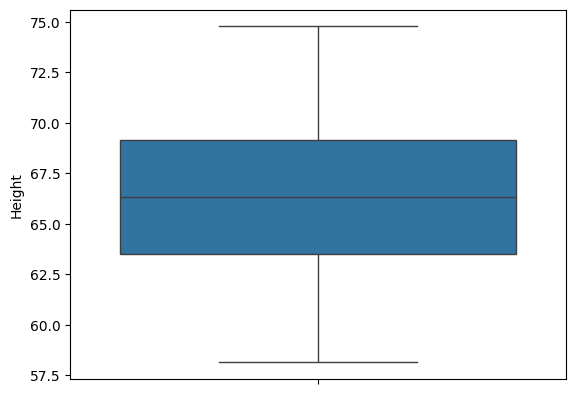

In [62]:
sns.boxplot(df['Height'])